<a href="https://www.kaggle.com/code/krishanand100/diameter-prediction?scriptVersionId=125363841" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/prediction-of-asteroid-diameter/Asteroid_Updated.csv
/kaggle/input/prediction-of-asteroid-diameter/Asteroid.csv


 # Predicting the diameter of an asteroid 
***Part A - data Set Preparation***
Missing values



# Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.simplefilter(action="ignore",category=FutureWarning)

# Load Data Set

In [3]:
df=pd.read_csv('../input/prediction-of-asteroid-diameter/Asteroid_Updated.csv')

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3552: DtypeWarning: Columns (0,10,15,16,23,24) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


# Data Set Exploration
Exploring the data set to understand better

In [4]:
df.head()

,name,a,e,i,om,w,q,ad,per_y,data_arc,...,UB,IR,spec_B,spec_T,G,moid,class,n,per,ma
0,Ceres,2.769165,0.076009,10.594067,80.305532,73.597694,2.558684,2.979647,4.608202,8822.0,...,0.426,NaN,C,G,0.12,1.59478,MBA,0.213885,1683.145708,77.372096
1,Pallas,2.772466,0.230337,34.836234,173.080063,310.048857,2.133865,3.411067,4.616444,72318.0,...,0.284,NaN,B,B,0.11,1.23324,MBA,0.213503,1686.155999,59.699133
2,Juno,2.669150,0.256942,12.988919,169.852760,248.138626,1.983332,3.354967,4.360814,72684.0,...,0.433,NaN,Sk,S,0.32,1.03454,MBA,0.226019,1592.787285,34.925016
3,Vesta,2.361418,0.088721,7.141771,103.810804,150.728541,2.151909,2.570926,3.628837,24288.0,...,0.492,NaN,V,V,0.32,1.13948,MBA,0.271609,1325.432765,95.861936
4,Astraea,2.574249,0.191095,5.366988,141.576605,358.687607,2.082324,3.066174,4.130323,63507.0,...,0.411,NaN,S,S,NaN,1.09589,MBA,0.238632,1508.600458,282.366289


In [5]:
df.shape

(839714, 31)

In [6]:
df.columns

Index(['name', 'a', 'e', 'i', 'om', 'w', 'q', 'ad', 'per_y', 'data_arc',
       'condition_code', 'n_obs_used', 'H', 'neo', 'pha', 'diameter', 'extent',
       'albedo', 'rot_per', 'GM', 'BV', 'UB', 'IR', 'spec_B', 'spec_T', 'G',
       'moid', 'class', 'n', 'per', 'ma'],
      dtype='object')

In [7]:
len(df.columns)

31

# Part A - Data Set Preparation

**A1. Renaming Columns**

Renaming columns for better understanding

In [8]:
new_columns_dict={'name':'obj_name','a':'semi-major_axis(au)','e':'eccentricity',
                    'i':'x-y_inclination(deg)','om':'longitude_asc_node','w':'argument_perihelion',
                    'q':'perihelion_dist(au)','ad':'aphelion_dist(au)', 'per_y':'orbital_period',
                   'data_arc':'data_arc(d)','condition_code':'condition_code','n_obs_used':'n_obs_used',
                   'H':'abs_mag_para', 'neo':'near_earth_obj', 'pha':'physically_hazardous_asteroid',
                   'diameter':'diameter','extent':'axial_ellipsoid_dim(Km)','albedo':'geo_albedo',
                   'rot_per':'rot_per(h)','GM':'std_gravitational_para','BV':'bv_color_mag_diff',
                   'UB':'ub_color_mag_diff','IR':'ir_color_mag_diff','spec_B':'SMASSII_spec_tax_type',
                   'spec_T':'Tholen_spec_tax_type','G':'mag_slope_para','moid':'earth_min_oribit_inter_dist(au)',
                   'class':'class','n':'mean_motion(deg/d)','per':'orbital_period(d)','ma':'mean_anomaly(deg)'}
df=df.rename(columns=new_columns_dict)
df.columns

Index(['obj_name', 'semi-major_axis(au)', 'eccentricity',
       'x-y_inclination(deg)', 'longitude_asc_node', 'argument_perihelion',
       'perihelion_dist(au)', 'aphelion_dist(au)', 'orbital_period',
       'data_arc(d)', 'condition_code', 'n_obs_used', 'abs_mag_para',
       'near_earth_obj', 'physically_hazardous_asteroid', 'diameter',
       'axial_ellipsoid_dim(Km)', 'geo_albedo', 'rot_per(h)',
       'std_gravitational_para', 'bv_color_mag_diff', 'ub_color_mag_diff',
       'ir_color_mag_diff', 'SMASSII_spec_tax_type', 'Tholen_spec_tax_type',
       'mag_slope_para', 'earth_min_oribit_inter_dist(au)', 'class',
       'mean_motion(deg/d)', 'orbital_period(d)', 'mean_anomaly(deg)'],
      dtype='object')

**A2. Missing Values**

In [9]:
#count of missing values
missing=pd.concat([pd.isnull(df).sum(),100*pd.isnull(df).mean()],axis=1)
missing.columns=['count','%']
missing.sort_values('count')

,count,%
eccentricity,0,0.000000
x-y_inclination(deg),0,0.000000
longitude_asc_node,0,0.000000
argument_perihelion,0,0.000000
perihelion_dist(au),0,0.000000
class,0,0.000000
n_obs_used,0,0.000000
orbital_period,1,0.000119
semi-major_axis(au),2,0.000238
mean_motion(deg/d),2,0.000238


The target feature 'diameter' has significant number of missing values

In [10]:
df['diameter'].notnull().sum()

137636

Still it has considerable number of rows to proceed after removing vacant rows

In [11]:
#removing rows where diamter values are missing
df=df.dropna(axis=0,subset=['diameter'])
len(df.index)

137636

The total number of rows are matching the number of rows with non null diameter values



In [12]:
#New percentage of missing values
missing2=pd.concat([pd.isnull(df).sum(),100*pd.isnull(df).mean()],axis=1)
missing2.columns=['count','%']
missing2.sort_values('count')
                   

,count,%
diameter,0,0.000000
mean_motion(deg/d),0,0.000000
class,0,0.000000
earth_min_oribit_inter_dist(au),0,0.000000
orbital_period(d),0,0.000000
physically_hazardous_asteroid,0,0.000000
near_earth_obj,0,0.000000
n_obs_used,0,0.000000
condition_code,0,0.000000
mean_anomaly(deg),0,0.000000


It's confirmed that missing values from 'diameter' columns has been removed. The data set still has input variables with high percentage of missing values. Using those to in ML model may fetch wrong results. Thus removing columns with high percentage of missing values

In [13]:
#columns to drop
drop_list=['abs_mag_para','geo_albedo','obj_name','rot_per(h)','SMASSII_spec_tax_type',
             'bv_color_mag_diff','Tholen_spec_tax_type','ub_color_mag_diff','mag_slope_para',
             'axial_ellipsoid_dim(Km)','std_gravitational_para','ir_color_mag_diff']
df.drop(drop_list,axis=1,inplace=True)
len(df.columns)

19

Initially 31 columns were there; now it has reduced to 19

**A3. Data type corrections**

In [14]:
#data types
df.dtypes

semi-major_axis(au)                float64
eccentricity                       float64
x-y_inclination(deg)               float64
longitude_asc_node                 float64
argument_perihelion                float64
perihelion_dist(au)                float64
aphelion_dist(au)                  float64
orbital_period                     float64
data_arc(d)                        float64
condition_code                      object
n_obs_used                           int64
near_earth_obj                      object
physically_hazardous_asteroid       object
diameter                            object
earth_min_oribit_inter_dist(au)    float64
class                               object
mean_motion(deg/d)                 float64
orbital_period(d)                  float64
mean_anomaly(deg)                  float64
dtype: object

Checking object features

In [15]:
df.select_dtypes('object').head()

,condition_code,near_earth_obj,physically_hazardous_asteroid,diameter,class
0,0,N,N,939.4,MBA
1,0,N,N,545,MBA
2,0,N,N,246.596,MBA
3,0,N,N,525.4,MBA
4,0,N,N,106.699,MBA


diamter should not be an object; its a numerical value

In [16]:
#converting diameter to numerical value
#df['diameter']=pd.to_numeric(df['diameter'])

Error in conversion at position 15

In [17]:
#checking the value at position 15
df['diameter'].iloc[15]

'226\u2009'

its a string. converting it to number

In [18]:
df.at[15,'diameter']=226

In [19]:
#checking the value again
df['diameter'].iloc[15]

226

In [20]:
df['diameter']=pd.to_numeric(df['diameter'])

Now the conversion is succesful

**A4. Unique Values**

unique values of object features

In [21]:
df['condition_code'].unique()

array([0, 1, 3, 2, '0', '1', '2', '3', '4', '5', '9', '7', 5.0, 6.0, 4.0,
       7.0, 9.0, 8.0, '8', '6'], dtype=object)

In [22]:
df['near_earth_obj'].unique()

array(['N', 'Y'], dtype=object)

In [23]:
df['physically_hazardous_asteroid'].unique()

array(['N', 'Y'], dtype=object)

In [24]:
df['class'].unique()

array(['MBA', 'OMB', 'MCA', 'AMO', 'IMB', 'TJN', 'CEN', 'APO', 'ATE',
       'AST', 'TNO'], dtype=object)

'condition code' has mix of data types. Convert it to integers

In [25]:
df['condition_code']=df['condition_code'].astype('int')
df['condition_code'].unique()

array([0, 1, 3, 2, 4, 5, 9, 7, 6, 8])

Now all the values seem fine

**A5.Value Counts**

Check whether each features has enough variation to construct model; if in a particular column, one of the value dominates others by huge margin, the ML model may fetch biased results.

In [26]:
df['near_earth_obj'].value_counts()

N    136786
Y       850
Name: near_earth_obj, dtype: int64

In [27]:
df['physically_hazardous_asteroid'].value_counts()

N    137415
Y       221
Name: physically_hazardous_asteroid, dtype: int64

In [28]:
df['class'].value_counts()

MBA    126390
OMB      7510
TJN      1874
IMB       588
APO       486
MCA       355
AMO       269
ATE        95
CEN        49
TNO        13
AST         7
Name: class, dtype: int64

Enough variations are there to keep the features


Checking out the integer features

In [29]:
df.select_dtypes('int64')

,condition_code,n_obs_used
0,0,1002
1,0,8490
2,0,7104
3,0,9325
4,0,2916
...,...,...
797860,1,50
798077,2,33
798189,1,47
799752,2,27


number of obseravtions should be of integer type. so keeping it the same

Checking out float features

In [30]:
df.select_dtypes('float64')

,semi-major_axis(au),eccentricity,x-y_inclination(deg),longitude_asc_node,argument_perihelion,perihelion_dist(au),aphelion_dist(au),orbital_period,data_arc(d),diameter,earth_min_oribit_inter_dist(au),mean_motion(deg/d),orbital_period(d),mean_anomaly(deg)
0,2.769165,0.076009,10.594067,80.305532,73.597694,2.558684,2.979647,4.608202,8822.0,939.400,1.59478,0.213885,1683.145708,77.372096
1,2.772466,0.230337,34.836234,173.080063,310.048857,2.133865,3.411067,4.616444,72318.0,545.000,1.23324,0.213503,1686.155999,59.699133
2,2.669150,0.256942,12.988919,169.852760,248.138626,1.983332,3.354967,4.360814,72684.0,246.596,1.03454,0.226019,1592.787285,34.925016
3,2.361418,0.088721,7.141771,103.810804,150.728541,2.151909,2.570926,3.628837,24288.0,525.400,1.13948,0.271609,1325.432765,95.861936
4,2.574249,0.191095,5.366988,141.576605,358.687607,2.082324,3.066174,4.130323,63507.0,106.699,1.09589,0.238632,1508.600458,282.366289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
797860,3.171225,0.159119,27.098625,309.036573,19.746812,2.666623,3.675826,5.647402,2373.0,3.793,1.66301,0.174527,2062.713583,164.999439
798077,2.548410,0.076071,11.593237,246.298656,170.090810,2.354549,2.742270,4.068291,3297.0,2.696,1.36733,0.242270,1485.943371,145.319581
798189,3.146246,0.220559,17.966646,137.981403,180.898833,2.452313,3.840180,5.580811,2839.0,2.917,1.43837,0.176610,2038.391053,174.609920
799752,3.051336,0.287449,14.456779,343.917822,342.614839,2.174231,3.928440,5.330196,2208.0,3.271,1.16684,0.184914,1946.853973,175.708508


All the above features suit float type

In [31]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
semi-major_axis(au),137636.0,2.814613,1.522740,0.626226,2.536714,2.750859,3.092537,3.891460e+02
eccentricity,137636.0,0.145485,0.077573,0.000489,0.089623,0.138543,0.191141,9.843482e-01
x-y_inclination(deg),137636.0,10.349182,6.835111,0.021855,5.120506,9.389963,13.738588,1.703236e+02
longitude_asc_node,137636.0,169.827629,102.713052,0.000738,82.334880,160.438430,256.268387,3.599909e+02
argument_perihelion,137636.0,181.904551,103.556464,0.004466,91.947943,183.669900,271.762261,3.599952e+02
perihelion_dist(au),137636.0,2.402609,0.516169,0.081882,2.068948,2.363897,2.685811,4.046567e+01
aphelion_dist(au),137636.0,3.226618,2.896374,0.999956,2.864438,3.167516,3.468608,7.722011e+02
orbital_period,137636.0,4.884248,25.532565,0.495569,4.040317,4.562581,5.438518,7.676743e+03
data_arc(d),137498.0,8969.818601,6165.176190,1.000000,6291.000000,7572.000000,9731.000000,7.268400e+04
condition_code,137636.0,0.485207,1.966078,0.000000,0.000000,0.000000,0.000000,9.000000e+00


Data Arc still has missing values. Looking at the distribution of each features

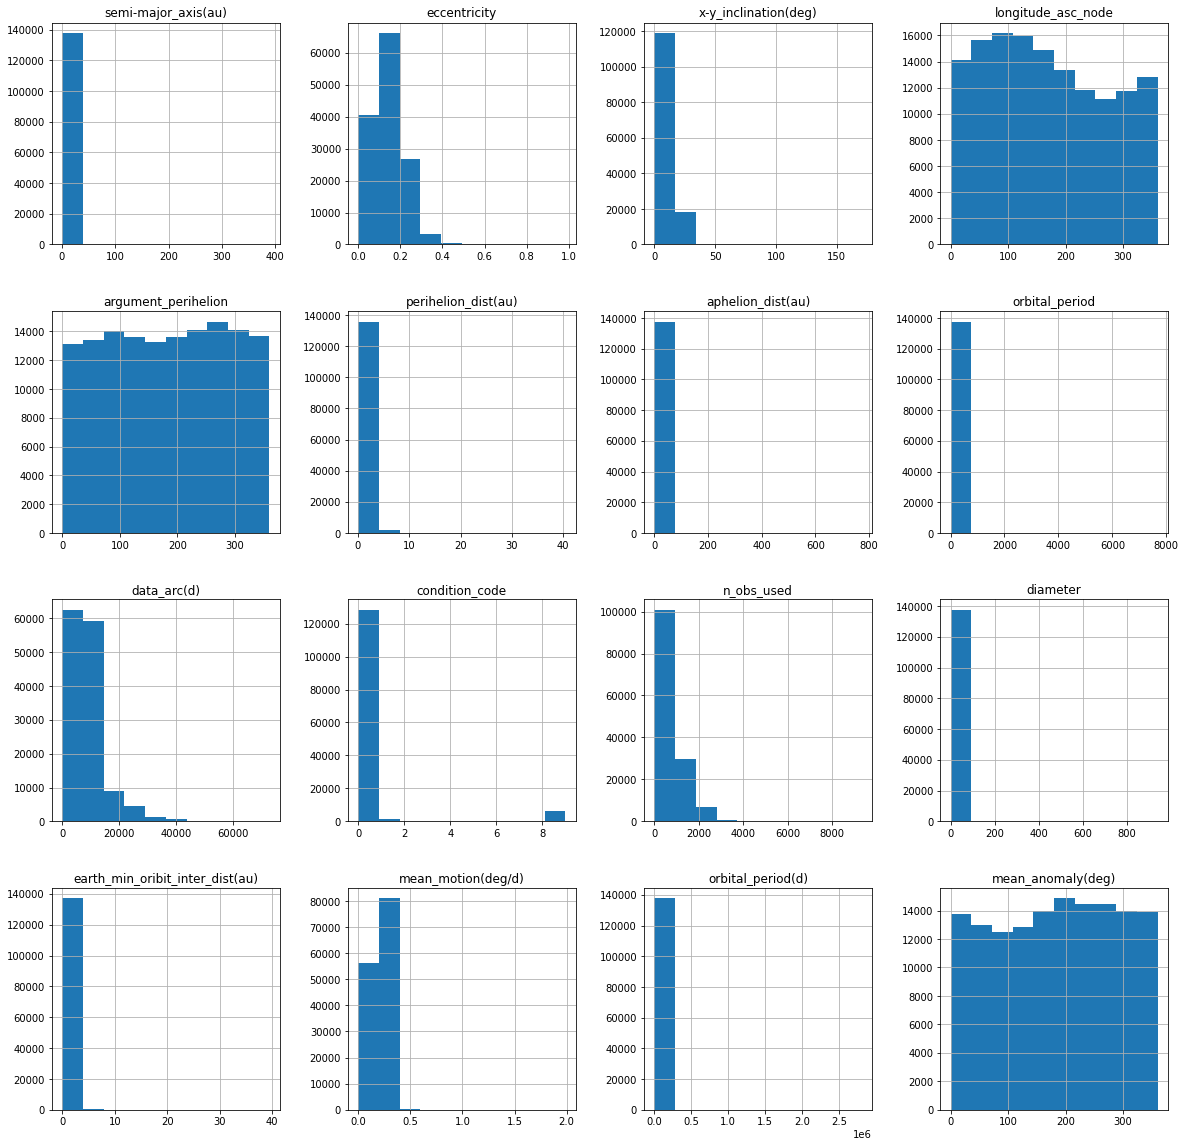

In [32]:
df.hist(figsize=(20,20))
plt.show()

Data Arc seems to have high variation. boxplot for same will give better idea

<AxesSubplot:xlabel='data_arc(d)'>

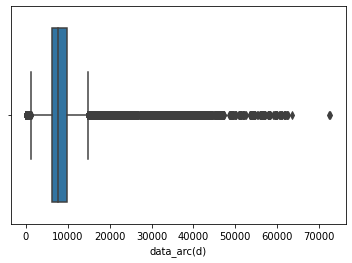

In [33]:
sns.boxplot(df['data_arc(d)'])

Data arc is much skewed so its better to fill the missing values with median than mean

In [34]:
df['data_arc(d)']=df['data_arc(d)'].fillna(df['data_arc(d)'].median())

In [35]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
semi-major_axis(au),137636.0,2.814613,1.522740,0.626226,2.536714,2.750859,3.092537,3.891460e+02
eccentricity,137636.0,0.145485,0.077573,0.000489,0.089623,0.138543,0.191141,9.843482e-01
x-y_inclination(deg),137636.0,10.349182,6.835111,0.021855,5.120506,9.389963,13.738588,1.703236e+02
longitude_asc_node,137636.0,169.827629,102.713052,0.000738,82.334880,160.438430,256.268387,3.599909e+02
argument_perihelion,137636.0,181.904551,103.556464,0.004466,91.947943,183.669900,271.762261,3.599952e+02
perihelion_dist(au),137636.0,2.402609,0.516169,0.081882,2.068948,2.363897,2.685811,4.046567e+01
aphelion_dist(au),137636.0,3.226618,2.896374,0.999956,2.864438,3.167516,3.468608,7.722011e+02
orbital_period,137636.0,4.884248,25.532565,0.495569,4.040317,4.562581,5.438518,7.676743e+03
data_arc(d),137636.0,8968.417086,6162.243453,1.000000,6292.000000,7572.000000,9726.000000,7.268400e+04
condition_code,137636.0,0.485207,1.966078,0.000000,0.000000,0.000000,0.000000,9.000000e+00


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 137636 entries, 0 to 810375
Data columns (total 19 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   semi-major_axis(au)              137636 non-null  float64
 1   eccentricity                     137636 non-null  float64
 2   x-y_inclination(deg)             137636 non-null  float64
 3   longitude_asc_node               137636 non-null  float64
 4   argument_perihelion              137636 non-null  float64
 5   perihelion_dist(au)              137636 non-null  float64
 6   aphelion_dist(au)                137636 non-null  float64
 7   orbital_period                   137636 non-null  float64
 8   data_arc(d)                      137636 non-null  float64
 9   condition_code                   137636 non-null  int64  
 10  n_obs_used                       137636 non-null  int64  
 11  near_earth_obj                   137636 non-null  object 
 12  ph

**Further checking on Object Features**

Deep dive into object variables for checking whether they are interconnected

In [37]:
data_type = df.dtypes
data_type[(data_type == 'object')].index.tolist()

['near_earth_obj', 'physically_hazardous_asteroid', 'class']

A common unit in astronomy is the astronomical unit (au), and is roughly equal to the distance from the Earth to the Sun or 150 million kilometers.

**Near Earth Object (NEO)** : An asteroid or comet that is less than 1.3 au from the sun.

**Physically Hazardous**: Determined by whether it is an NEO and its size.

**Class**: This is the orbit class, such as if it is part of the main asteroid belt, orbits a larger planet, or is near earth.

**Physically hazardous** classifier is based out of **diameter**(target), so it cannot be used for modelling.
**Near Earth Object** classifier is already explained in class, so it is not needed for further exploration

In [38]:
drop_list=['near_earth_obj', 'physically_hazardous_asteroid']
df.drop(drop_list,axis=1,inplace=True)

**checking how the target (diameter) is distributed over orbit class**

In [39]:
#Set Plot Colors
sns.set_palette('inferno', 11)

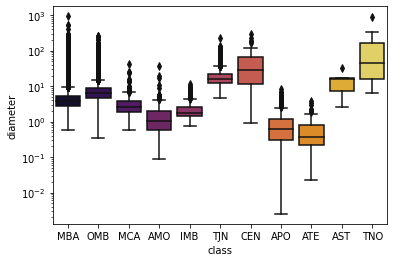

In [40]:
sns.boxplot(x='class', y='diameter', data=df)
plt.yscale('log');

There does appear to be some relationship between the diameter of an asteroid and where it orbits. Orbits are determined by strength of gravity, which is determined by the size of the two objects and how close they are to each other. So, it makes sense that larger asteroids are going to be closer to the larger planets, than to Earth

**Explore the target variable**

In [41]:
df['diameter'].describe()

count    137636.000000
mean          5.483228
std           9.385735
min           0.002500
25%           2.770000
50%           3.956000
75%           5.742000
max         939.400000
Name: diameter, dtype: float64

**How the target variable distributed over the class classifier**

In [42]:
class_group=df.groupby('class').agg({'diameter':['mean','median','min','max','std','var','count']})
print(class_group)

         diameter                                                            
             mean   median     min      max         std           var   count
class                                                                        
AMO      1.766591   1.0450  0.0880   37.675    2.971932      8.832382     269
APO      0.958425   0.6025  0.0025    8.480    1.097541      1.204597     486
AST     14.283429  16.4000  2.6560   32.492   10.028549    100.571796       7
ATE      0.630716   0.3700  0.0230    3.879    0.702853      0.494002      95
CEN     52.473245  28.0000  0.8900  302.000   63.978581   4093.258785      49
IMB      2.288675   1.7460  0.7420   11.506    1.470614      2.162706     588
MBA      5.076341   3.8340  0.6000  939.400    8.277078     68.510018  126390
MCA      3.411217   2.5570  0.5870   42.870    3.512911     12.340547     355
OMB      8.783017   6.3565  0.3470  254.000   12.023403    144.562224    7510
TJN     20.771467  15.4710  4.5620  225.000   16.487683    271.8

**Distribution of Condition code over diameter**

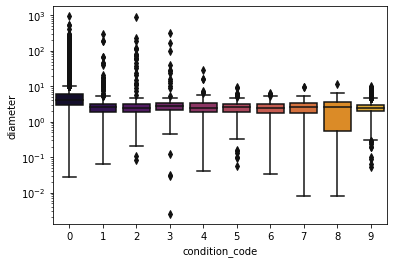

In [43]:
sns.boxplot(x='condition_code',y='diameter',data=df)
plt.yscale('log')

It is evdient that diameter doesn't change much over different condition code. So no need to keep it for modelling

In [44]:
df.drop('condition_code',axis=1,inplace=True)

**Explore the numerical features- Correlation**

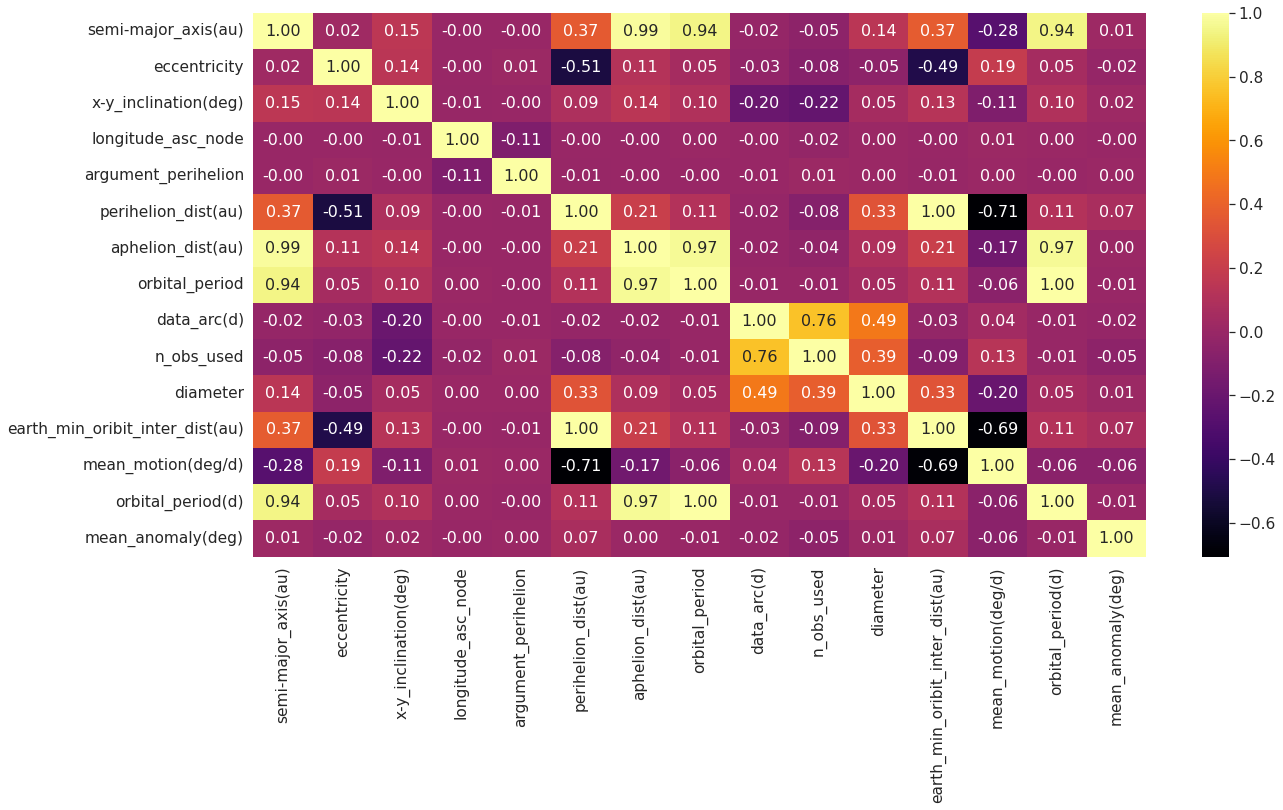

In [45]:
plt.figure(figsize=(20,10))
sns.set(font_scale=1.4)
sns.heatmap(df.corr(),annot=True, cmap='inferno', fmt='.2f', annot_kws={'size':16});

Few features are correlated. Removing them

In [46]:
#orbital_period(d) and orbital_period
df.drop('orbital_period', axis=1, inplace=True)
#perihelion_distance and earth_min_orbit_inter_dist(au)
df.drop('earth_min_oribit_inter_dist(au)', axis=1, inplace=True)

In [47]:
df.shape

(137636, 14)

In [48]:
#copying the current data frame into another variable for future purposes
df2=df

In [49]:
#assign dummy values to categorical variable
df=pd.get_dummies(df,columns=['class'])


In [50]:
df.columns

Index(['semi-major_axis(au)', 'eccentricity', 'x-y_inclination(deg)',
       'longitude_asc_node', 'argument_perihelion', 'perihelion_dist(au)',
       'aphelion_dist(au)', 'data_arc(d)', 'n_obs_used', 'diameter',
       'mean_motion(deg/d)', 'orbital_period(d)', 'mean_anomaly(deg)',
       'class_AMO', 'class_APO', 'class_AST', 'class_ATE', 'class_CEN',
       'class_IMB', 'class_MBA', 'class_MCA', 'class_OMB', 'class_TJN',
       'class_TNO'],
      dtype='object')

In [51]:
df.head()

,semi-major_axis(au),eccentricity,x-y_inclination(deg),longitude_asc_node,argument_perihelion,perihelion_dist(au),aphelion_dist(au),data_arc(d),n_obs_used,diameter,...,class_APO,class_AST,class_ATE,class_CEN,class_IMB,class_MBA,class_MCA,class_OMB,class_TJN,class_TNO
0,2.769165,0.076009,10.594067,80.305532,73.597694,2.558684,2.979647,8822.0,1002,939.400,...,0,0,0,0,0,1,0,0,0,0
1,2.772466,0.230337,34.836234,173.080063,310.048857,2.133865,3.411067,72318.0,8490,545.000,...,0,0,0,0,0,1,0,0,0,0
2,2.669150,0.256942,12.988919,169.852760,248.138626,1.983332,3.354967,72684.0,7104,246.596,...,0,0,0,0,0,1,0,0,0,0
3,2.361418,0.088721,7.141771,103.810804,150.728541,2.151909,2.570926,24288.0,9325,525.400,...,0,0,0,0,0,1,0,0,0,0
4,2.574249,0.191095,5.366988,141.576605,358.687607,2.082324,3.066174,63507.0,2916,106.699,...,0,0,0,0,0,1,0,0,0,0


In [52]:
df.shape

(137636, 24)

# Part B - Model building

Split data into features and target

In [53]:

y=df['diameter'] #target
x=df.drop(columns='diameter') #independent features

Standardize the features

In [54]:
#apply a standardized scaler to the data
SS_scaler=StandardScaler()
#Fit the standard scaler to the data
x_std=SS_scaler.fit_transform(x)

Create Training and Testing data

In [55]:
X_train,X_test,Y_train,Y_test=train_test_split(x_std,y,test_size=0.2,random_state=42)

In [56]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Linear Regression

In [57]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,Y_train)
diameter_prediction=model.predict(X_test)
mse=mean_squared_error(Y_test,diameter_prediction)
rmse=np.sqrt(mse)
print("root mean squared error:"+str(rmse))
r2=r2_score(Y_test,diameter_prediction)
print("r2:",r2)

root mean squared error:8.281260871975068
r2: 0.3008495396647336


r2 square need to be improved

In [58]:
print(f'constant={model.intercept_}')
print(f'coefficients={model.coef_}')

constant=5.4936839979331085
coefficients=[-3.54659238e+13  3.45312500e+00  1.12007288e+00  8.17730527e-02
  6.75692436e-02  6.01101036e+12  3.37295264e+13  4.02317743e+00
  1.28764528e+00  2.26223233e+00  3.54459837e+00 -1.74625695e-02
  8.74276567e+11  1.17421475e+12  1.41167749e+11  5.19887509e+11
  3.73437762e+11  1.29108996e+12  5.42234177e+12  1.00403970e+12
  4.49607451e+12  2.29406330e+12  1.92375020e+11]


**Adjusted r2**

In [59]:
n=137636 #number of observation
p=23 #number of independent variables
R2=0.3008495396647336
adj_r2=1-(1-R2)*(n-1)/(n-p-1)
print(f'Adjusted r2 score={adj_r2}')

Adjusted r2 score=0.3007326860430457


**Ridge Regression**

In [60]:
from sklearn.linear_model import Ridge
model = Ridge()
model.fit(X_train, Y_train)
model.predict(X_test)

diameterPrediction  = model.predict(X_test)
mse = mean_squared_error(Y_test, diameterPrediction)
rmse = np.sqrt(mse)
print("root mean square error : "+str(rmse))

r2 = r2_score(Y_test,diameterPrediction)
print("R2 Score : ",r2) 

root mean square error : 8.281017641191998
R2 Score :  0.3008906088736909


Still r2 score is not improved. so introduce hyperparameter tuning for ridge regression

In [61]:
from sklearn.model_selection import GridSearchCV #iteration tool

ridge=Ridge()
parameters={"alpha":[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,25,30,35,40,45,50,60,70,85,100,105,125,145,150,160,168,170,172,171,180,200,210]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X_train,Y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=5.55714e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 25, 30, 35, 40, 45, 50, 60, 70, 85, 100,
                                   105, 125, 145, 150, 160, 168, 170, 172, 171,
                                   180, 200, ...]},
             scoring='neg_mean_squared_error')

In [62]:
print(ridge_regressor.best_params_) #best alpha value to use

{'alpha': 210}


applying alpha=170 in ridge instead of default value 1

In [63]:
model = Ridge(alpha=210)
model.fit(X_train, Y_train)
model.predict(X_test)

diameterPrediction  = model.predict(X_test)
mse = mean_squared_error(Y_test, diameterPrediction)
rmse = np.sqrt(mse)
print("root mean square error : "+str(rmse))

r2 = r2_score(Y_test,diameterPrediction)
print("R2 Score : ",r2) 

root mean square error : 8.276903614015668
R2 Score :  0.30158507438963167


We can see a minute improvement in the r2 value

**Lasso**

In [64]:
from sklearn import linear_model
model = linear_model.Lasso(alpha=0.1)
model.fit(X_train, Y_train)
model.predict(X_test)

diameterPrediction  = model.predict(X_test)
mse = mean_squared_error(Y_test, diameterPrediction)
rmse = np.sqrt(mse)
print("root mean square error : "+str(rmse))

r2 = r2_score(Y_test,diameterPrediction)
print("R2 Score : ",r2)

root mean square error : 8.263816406244741
R2 Score :  0.3037919564493371


r2 score is better than ridge regression even before hyperparameter tuning

**Lasso with hyper parameter tuning**

In [65]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso=Lasso()
parameters={"alpha":[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,25,30,35,40,45,50,60,70,85,100,105,125,145,150,160,168,170,172,171,180,200]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)
lasso_regressor.fit(X_train,Y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.959e+06, tolerance: 7.355e+02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.006e+06, tolerance: 6.978e+02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisa

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 25, 30, 35, 40, 45, 50, 60, 70, 85, 100,
                                   105, 125, 145, 150, 160, 168, 170, 172, 171,
                                   180, 200]},
             scoring='neg_mean_squared_error')

In [66]:
print(lasso_regressor.best_params_) #best alpha value to use

{'alpha': 1e-15}


using this alpha in lasso

In [67]:
from sklearn import linear_model
model = linear_model.Lasso(alpha=1e-15)
model.fit(X_train, Y_train)
model.predict(X_test)

diameterPrediction  = model.predict(X_test)
mse = mean_squared_error(Y_test, diameterPrediction)
rmse = np.sqrt(mse)
print("root mean square error : "+str(rmse))

r2 = r2_score(Y_test,diameterPrediction)
print("R2 Score : ",r2)

root mean square error : 8.28103911414248
R2 Score :  0.30088698324180574


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.579e+06, tolerance: 9.424e+02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


This hyper parameter tuning reduced the r2 value. So maybe we have to change grid search to randomised search, k fold search, cross validation etc.


**KNN**

In [68]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor()
model.fit(X_train, Y_train)
model.predict(X_test)

diameterPrediction  = model.predict(X_test)
mse = mean_squared_error(Y_test, diameterPrediction)
rmse = np.sqrt(mse)
print("root mean square error : "+str(rmse))

r2 = r2_score(Y_test,diameterPrediction)
print("R2 Score : ",r2)

root mean square error : 6.977211284594397
R2 Score :  0.5037032109088937


r2 has improved. Now its more than 0.5 

KNN hyper parameter tuning

In [69]:
'''
from sklearn.model_selection import KFold
KNN=KNeighborsRegressor()
seed=13
kfold=KFold(n_splits=3,shuffle=True,random_state=seed)
#Define candidate hyperparameters
hp_candidates=[{'n_neighbors':[4,5,6,7],'weights':['uniform','distance']}]
#search for best parameters
grid=GridSearchCV(estimator=KNN,param_grid=hp_candidates,cv=kfold,scoring='r2')
grid.fit(X_train,Y_train)
'''

"\nfrom sklearn.model_selection import KFold\nKNN=KNeighborsRegressor()\nseed=13\nkfold=KFold(n_splits=3,shuffle=True,random_state=seed)\n#Define candidate hyperparameters\nhp_candidates=[{'n_neighbors':[4,5,6,7],'weights':['uniform','distance']}]\n#search for best parameters\ngrid=GridSearchCV(estimator=KNN,param_grid=hp_candidates,cv=kfold,scoring='r2')\ngrid.fit(X_train,Y_train)\n"

In [70]:
#grid.best_params_ #finding best hyper parameters

In [71]:
'''
model=KNeighborsRegressor(n_neighbors=6,weights='distance')
model.fit(X_train,Y_train)
model.predict(X_test)
diameterPrediction  = model.predict(X_test)
mse = mean_squared_error(Y_test, diameterPrediction)
rmse = np.sqrt(mse)
print("root mean square error : "+str(rmse))

r2 = r2_score(Y_test,diameterPrediction)
print("R2 Score : ",r2)
'''

'\nmodel=KNeighborsRegressor(n_neighbors=6,weights=\'distance\')\nmodel.fit(X_train,Y_train)\nmodel.predict(X_test)\ndiameterPrediction  = model.predict(X_test)\nmse = mean_squared_error(Y_test, diameterPrediction)\nrmse = np.sqrt(mse)\nprint("root mean square error : "+str(rmse))\n\nr2 = r2_score(Y_test,diameterPrediction)\nprint("R2 Score : ",r2)\n'

**SVR**

In [72]:
'''
from sklearn.svm import SVR
model = SVR()
model.fit(X_train, Y_train)
model.predict(X_test)

diameterPrediction  = model.predict(X_test)
mse = mean_squared_error(Y_test, diameterPrediction)
rmse = np.sqrt(mse)
print("root mean square error : "+str(rmse))

r2 = r2_score(Y_test,diameterPrediction)
print("R2 Score : ",r2)
'''

'\nfrom sklearn.svm import SVR\nmodel = SVR()\nmodel.fit(X_train, Y_train)\nmodel.predict(X_test)\n\ndiameterPrediction  = model.predict(X_test)\nmse = mean_squared_error(Y_test, diameterPrediction)\nrmse = np.sqrt(mse)\nprint("root mean square error : "+str(rmse))\n\nr2 = r2_score(Y_test,diameterPrediction)\nprint("R2 Score : ",r2)\n'

Here the r2 score is less than KNN

Hyper parameter tuning for improving r2 score

In [73]:
'''
param_grid={'C':[0.1,1,10,100,1000],
          # 'gama':[1,0.1,0.01,0.001,0.0001],
          # 'kernel':['linear','rbf','poly','sigmoid']}
#grid=GridSearchCV(SVR(),param_grid,refit=True,verbose=3)
#grid.fit(x_train,y_train)
#time consuming processing
'''

"\nparam_grid={'C':[0.1,1,10,100,1000],\n          # 'gama':[1,0.1,0.01,0.001,0.0001],\n          # 'kernel':['linear','rbf','poly','sigmoid']}\n#grid=GridSearchCV(SVR(),param_grid,refit=True,verbose=3)\n#grid.fit(x_train,y_train)\n#time consuming processing\n"

**Decision Tree**

In [74]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(X_train, Y_train)
model.predict(X_test)

diameterPrediction  = model.predict(X_test)
mse = mean_squared_error(Y_test, diameterPrediction)
rmse = np.sqrt(mse)
print("root mean square error : "+str(rmse))
r2 = r2_score(Y_test,diameterPrediction)
print("R2 Score : ",r2) 

root mean square error : 7.906798963918301
R2 Score :  0.36264835690901054


**Random Forest**

In [75]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, Y_train)
model.predict(X_test)

diameterPrediction  = model.predict(X_test)
mse = mean_squared_error(Y_test, diameterPrediction)
rmse = np.sqrt(mse)
print("root mean square error : "+str(rmse))

r2 = r2_score(Y_test,diameterPrediction)
print("R2 Score : ",r2)

root mean square error : 6.784765776126654
R2 Score :  0.53070337014317


**Ada Boost**

In [76]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error      #for getting the mean squared error
from sklearn.metrics import r2_score         #to get the accuracy of each model

In [77]:
# Create adaboost classifer object
AdaModel = AdaBoostRegressor(n_estimators=100,
                         learning_rate=1)
# Train Adaboost Classifer
model = AdaModel.fit(X_train, Y_train)
 
#Predict the response for test dataset
diameterPrediction = model.predict(X_test)

In [78]:
mse = mean_squared_error(Y_test, diameterPrediction)
rmse = np.sqrt(mse)
print("root mean square error : "+str(rmse))

r2 = r2_score(Y_test,diameterPrediction)
print("R2 Score : ",r2)

root mean square error : 8.841013169069655
R2 Score :  0.20314043257726555


#Time taken : 10 sec

AdaBoost - With customized Base Model = linear regression

In [79]:
# Import Support Vector Regressor
from sklearn.linear_model import LinearRegression
LR = LinearRegression()

# Create adaboost classifer object
abc =AdaBoostRegressor(n_estimators=200, base_estimator=LR,learning_rate=1)
model = abc.fit(X_train, Y_train)

In [80]:
diameterPrediction = model.predict(X_test)
mse = mean_squared_error(Y_test, diameterPrediction)
rmse = np.sqrt(mse)
print("root mean square error : "+str(rmse))

r2 = r2_score(Y_test,diameterPrediction)
print("R2 Score : ",r2)

root mean square error : 36.207678333436235
R2 Score :  -12.365311131142231


AdaBoost - With customized Base Model = knn

In [81]:
'''
from sklearn.neighbors import KNeighborsRegressor
KNN = KNeighborsRegressor()
# Create adaboost classifer object
abc =AdaBoostRegressor(n_estimators=200, base_estimator=KNN,learning_rate=1)
model = abc.fit(X_train, Y_train)
'''

'\nfrom sklearn.neighbors import KNeighborsRegressor\nKNN = KNeighborsRegressor()\n# Create adaboost classifer object\nabc =AdaBoostRegressor(n_estimators=200, base_estimator=KNN,learning_rate=1)\nmodel = abc.fit(X_train, Y_train)\n'

In [82]:
'''
diameterPrediction = model.predict(X_test)
mse = mean_squared_error(Y_test, diameterPrediction)
rmse = np.sqrt(mse)
print("root mean square error : "+str(rmse))

r2 = r2_score(Y_test,diameterPrediction)
print("R2 Score : ",r2)
'''

'\ndiameterPrediction = model.predict(X_test)\nmse = mean_squared_error(Y_test, diameterPrediction)\nrmse = np.sqrt(mse)\nprint("root mean square error : "+str(rmse))\n\nr2 = r2_score(Y_test,diameterPrediction)\nprint("R2 Score : ",r2)\n'

Gradient Boost

In [83]:
# Create gradientboost REGRESSOR object
from sklearn.ensemble import GradientBoostingRegressor
gradientregressor = GradientBoostingRegressor(max_depth=2,n_estimators=3,learning_rate=1.0)

In [84]:
# Train gradientboost REGRESSOR
model = gradientregressor.fit(X_train, Y_train)

#Predict the response for test dataset
diameterPrediction = model.predict(X_test)

In [85]:
mse = mean_squared_error(Y_test, diameterPrediction)
rmse = np.sqrt(mse)
print("root mean square error : "+str(rmse))

r2 = r2_score(Y_test,diameterPrediction)
print("R2 Score : ",r2)

root mean square error : 7.617107183074874
R2 Score :  0.4084957765935181


In [86]:
'''
#Hyper Parameter tuning (Will take more time)
from sklearn.model_selection import GridSearchCV
LR = {'learning_rate':[0.15,0.1,0.10,0.05], 'n_estimators':[100,150,200,250]}

tuning = GridSearchCV(estimator =GradientBoostingRegressor(), 
            param_grid = LR, scoring='r2')
tuning.fit(X_train,y_train)
tuning.best_params_, tuning.best_score_
'''

"\n#Hyper Parameter tuning (Will take more time)\nfrom sklearn.model_selection import GridSearchCV\nLR = {'learning_rate':[0.15,0.1,0.10,0.05], 'n_estimators':[100,150,200,250]}\n\ntuning = GridSearchCV(estimator =GradientBoostingRegressor(), \n            param_grid = LR, scoring='r2')\ntuning.fit(X_train,y_train)\ntuning.best_params_, tuning.best_score_\n"

In [87]:
#I am choosing 'n_estimators=200,learning_rate=0.15'
gradientregressor = GradientBoostingRegressor(max_depth=2,n_estimators=200,learning_rate=0.15)
model = gradientregressor.fit(X_train, Y_train)
diameterPrediction = model.predict(X_test)
r2 = r2_score(Y_test,diameterPrediction)
print("R2 Score : ",r2)

R2 Score :  0.5247954770412671


XG Boost

In [88]:
!pip install xgboost

In [89]:
from xgboost import XGBRegressor

In [90]:
from sklearn.svm import SVR

In [91]:
#Running various models
models = []
models.append(('SVM', SVR()))
models.append(('XGB',XGBRegressor(eta=0.01,gamma=10))) #eta = 0.01,gamma = 10

In [92]:
''''
import time

# evaluate each model in turn
results = []
names = []

for name, model in models:
    start_time = time.time()
    model.fit(X_train, Y_train)

    y_pred = model.predict(X_test)
    predictions = [round(value) for value in y_pred]


    # evaluate predictions
    R2 = r2_score(Y_test, predictions)             
    print("R2 Score", (R2),name)
    print("Time_Taken",  (time.time() - start_time))
    '''

'\'\nimport time\n\n# evaluate each model in turn\nresults = []\nnames = []\n\nfor name, model in models:\n    start_time = time.time()\n    model.fit(X_train, Y_train)\n\n    y_pred = model.predict(X_test)\n    predictions = [round(value) for value in y_pred]\n\n\n    # evaluate predictions\n    R2 = r2_score(Y_test, predictions)             \n    print("R2 Score", (R2),name)\n    print("Time_Taken",  (time.time() - start_time))\n    '

CAT Boost

In [93]:
!pip install catboost

In [94]:
from catboost import CatBoostRegressor, Pool

In [95]:
df2['class']

0         MBA
1         MBA
2         MBA
3         MBA
4         MBA
         ... 
797860    MBA
798077    MBA
798189    MBA
799752    MBA
810375    MBA
Name: class, Length: 137636, dtype: object

In [96]:
#Split data into features and target.
y = df2['diameter']
X = df2.drop(columns = 'diameter')

In [97]:
from catboost import CatBoostRegressor, Pool

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, 
                                                    random_state=42)

In [99]:
pool_train = Pool(X_train, Y_train,
                  cat_features = ['class'])

pool_test = Pool(X_test, cat_features = ['class'])

In [100]:
import time

start = time.time()

cbr = CatBoostRegressor(iterations=500,max_depth=2)

cbr.fit(pool_train)
diameterPrediction = cbr.predict(X_test)

Learning rate set to 0.15119
0:	learn: 8.7656684	total: 78.1ms	remaining: 39s
1:	learn: 8.3681763	total: 90.9ms	remaining: 22.6s
2:	learn: 8.0565848	total: 107ms	remaining: 17.7s
3:	learn: 7.7901404	total: 121ms	remaining: 15s
4:	learn: 7.5782780	total: 136ms	remaining: 13.4s
5:	learn: 7.4023731	total: 146ms	remaining: 12s
6:	learn: 7.2329723	total: 157ms	remaining: 11.1s
7:	learn: 7.0955291	total: 174ms	remaining: 10.7s
8:	learn: 6.9847973	total: 186ms	remaining: 10.2s
9:	learn: 6.8642847	total: 201ms	remaining: 9.87s
10:	learn: 6.7649538	total: 214ms	remaining: 9.52s
11:	learn: 6.6943891	total: 225ms	remaining: 9.14s
12:	learn: 6.6160641	total: 238ms	remaining: 8.9s
13:	learn: 6.5504062	total: 248ms	remaining: 8.61s
14:	learn: 6.5089120	total: 258ms	remaining: 8.35s
15:	learn: 6.4432859	total: 271ms	remaining: 8.2s
16:	learn: 6.3900580	total: 284ms	remaining: 8.07s
17:	learn: 6.3584964	total: 297ms	remaining: 7.96s
18:	learn: 6.3170107	total: 310ms	remaining: 7.85s
19:	learn: 6.26840

In [101]:
mse = mean_squared_error(y_test, diameterPrediction)
rmse = np.sqrt(mse)
print("root mean square error : "+str(rmse))

r2 = r2_score(y_test,diameterPrediction)
print("R2 Score : ",r2)

end = time.time()
diff = end - start
print('Execution time:', diff)

root mean square error : 7.0169129919659605
R2 Score :  0.49803908854775614
Execution time: 6.56492280960083


Light GBM

In [102]:
!pip install lightm

ERROR: Could not find a version that satisfies the requirement lightm (from versions: none)
ERROR: No matching distribution found for lightm


In [103]:
import lightgbm

In [104]:
'''
start = time.time()

lgbmr = lightgbm.LGBMRegressor()

lgbmr.fit(X_train, Y_train)
y_pred = lgbmr.predict(X_test)

mse = mean_squared_error(Y_test, diameterPrediction)
rmse = np.sqrt(mse)
print("root mean square error : "+str(rmse))

r2 = r2_score(Y_test,diameterPrediction)
print("R2 Score : ",r2)


end = time.time()
diff = end - start
print('Execution time:', diff)
'''

'\nstart = time.time()\n\nlgbmr = lightgbm.LGBMRegressor()\n\nlgbmr.fit(X_train, Y_train)\ny_pred = lgbmr.predict(X_test)\n\nmse = mean_squared_error(Y_test, diameterPrediction)\nrmse = np.sqrt(mse)\nprint("root mean square error : "+str(rmse))\n\nr2 = r2_score(Y_test,diameterPrediction)\nprint("R2 Score : ",r2)\n\n\nend = time.time()\ndiff = end - start\nprint(\'Execution time:\', diff)\n'